In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [173]:
df=pd.read_csv('/Users/dylanbai/Desktop/Data Science2/archive (2)/train.csv',sep=';')

In [174]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [175]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [176]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


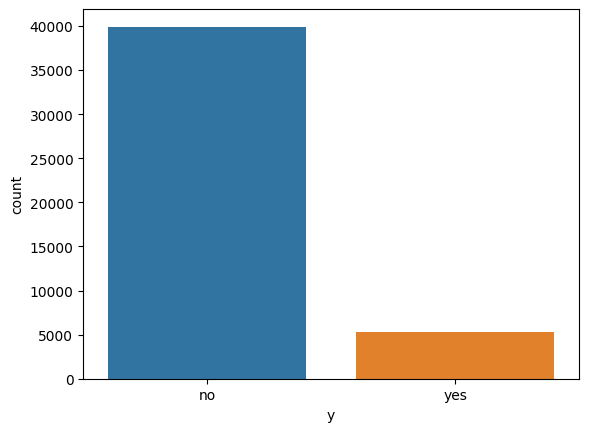

In [177]:
sns.countplot(x='y', data=df)
plt.show()

In [178]:
df['y'] = df['y'].map({'yes': 1, 'no': 0}).astype(int)

<Axes: xlabel='y', ylabel='age'>

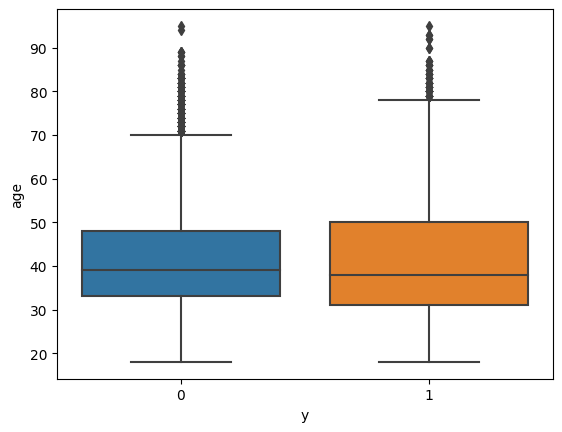

In [179]:
sns.boxplot(x='y', y='age', data=df) 

In [180]:
age_outliers=df[df['age']>80].index
df.drop(age_outliers,inplace=True)

<Axes: xlabel='y', ylabel='day'>

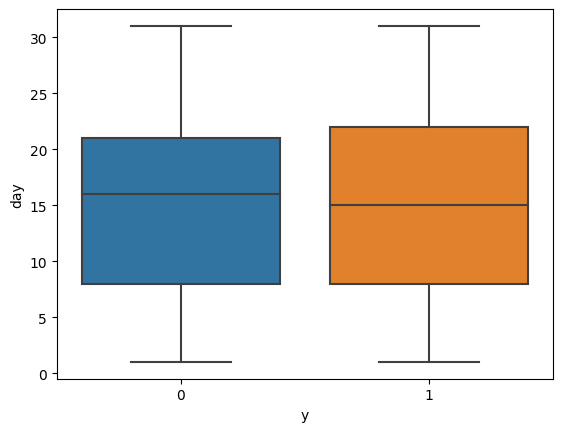

In [181]:
sns.boxplot(x='y', y='day', data=df) 

<Axes: xlabel='y', ylabel='balance'>

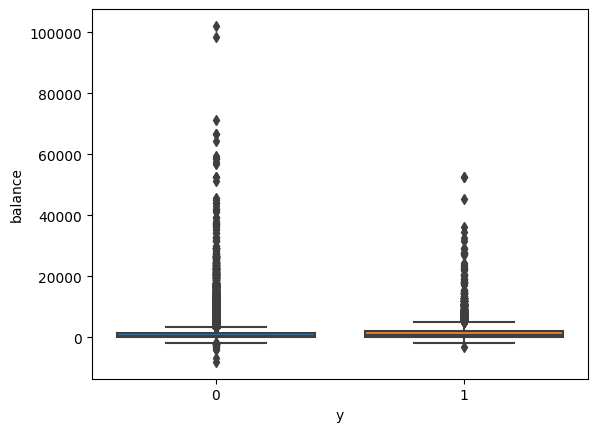

In [182]:
sns.boxplot(x='y', y='balance', data=df) 

In [183]:
balance_outliers=df[df['balance']>60000].index
df.drop(balance_outliers,inplace=True)

<Axes: xlabel='y', ylabel='duration'>

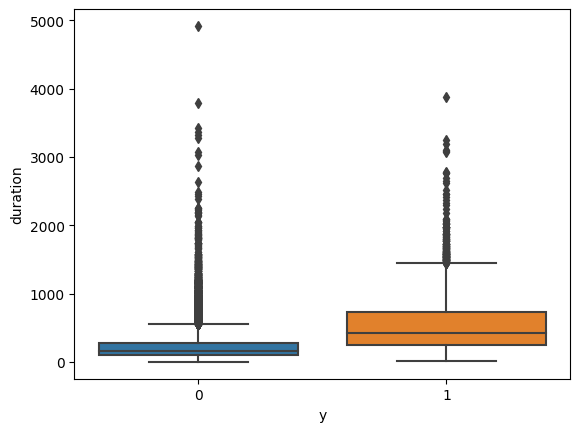

In [184]:
sns.boxplot(x='y', y='duration', data=df) 

In [185]:
duration_outliers=df[df['duration']>3500].index
df.drop(duration_outliers,inplace=True)

<Axes: xlabel='y', ylabel='campaign'>

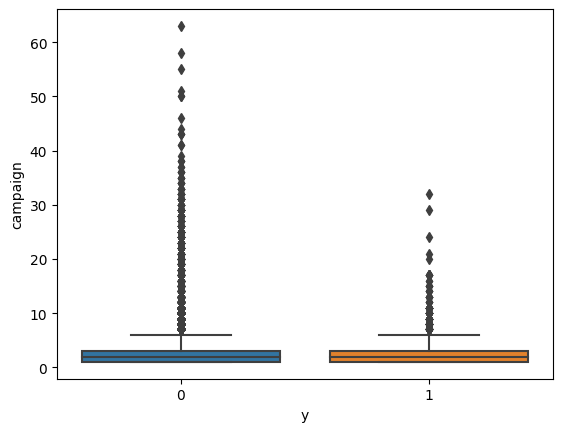

In [186]:
sns.boxplot(x='y', y='campaign', data=df) 

In [187]:
campaign_outliers=df[df['campaign']>50].index
df.drop(campaign_outliers,inplace=True)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45099 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45099 non-null  int64 
 1   job        45099 non-null  object
 2   marital    45099 non-null  object
 3   education  45099 non-null  object
 4   default    45099 non-null  object
 5   balance    45099 non-null  int64 
 6   housing    45099 non-null  object
 7   loan       45099 non-null  object
 8   contact    45099 non-null  object
 9   day        45099 non-null  int64 
 10  month      45099 non-null  object
 11  duration   45099 non-null  int64 
 12  campaign   45099 non-null  int64 
 13  pdays      45099 non-null  int64 
 14  previous   45099 non-null  int64 
 15  poutcome   45099 non-null  object
 16  y          45099 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 6.2+ MB


### check the distribution of the categorical column to see if the varible is significant to the target value 'y': 

In [189]:
df_marital = df.groupby(['y','marital'])[['age']].count().unstack()
df_marital

age               
marital divorced married single
y                              
0           4561   24420  10873
1            608    2727   1910

### the'marital' variable's ditribution shows that it might be a significant variable.

In [190]:
df_job = df.groupby(['y','job'])[['age']].count().unstack()
df_job

age                                                         
job admin. blue-collar entrepreneur housemaid management retired   
y                                                                  
0     4539        9023         1364      1126       8151    1698  \
1      631         708          122       108       1300     475   

                                                                  
job self-employed services student technician unemployed unknown  
y                                                                 
0            1392     3784     669       6754       1101     253  
1             187      369     269        840        202      34

### the distribution of the 'job' shows obvious differences in the target value so it should be a significant variable.

In [191]:
df_education = df.groupby(['y','education'])[['age']].count().unstack()
df_education

age                           
education primary secondary tertiary unknown
y                                           
0            6226     20740    11292    1596
1             563      2441     1993     248

### the education level has a slight influence in the target value.

In [192]:
df_default = df.groupby(['y','default'])[['age']].count().unstack()
df_default

age     
default     no  yes
y                  
0        39091  763
1         5193   52

### the variable 'default' should be a significant variable since people with a record of default subscribe a deposite at a higher rate than those without a record of default

In [193]:
df_housing = df.groupby(['y','housing'])[['age']].count().unstack()
df_housing

age       
housing     no    yes
y                    
0        16664  23190
1         3310   1935

### the variable 'housing' should be a significant variable since people without house loan subscribe a deposite at a higher rate than those who have alread had a house loan.

In [194]:
df_loan= df.groupby(['y','loan'])[['age']].count().unstack()
df_loan

age      
loan     no   yes
y                
0     33094  6760
1      4761   484

### the variable 'loan' should be a significant variable since people without a personal loan subscribe a deposite at a higher rate than those who have alread had one.

In [195]:
df_contact = df.groupby(['y','contact'])[['age']].count().unstack()
df_contact

age                  
contact cellular telephone unknown
y                                 
0          24888      2481   12485
1           4352       364     529

### the variable 'contact' can be considered as a significant variable since the 'unknown' has a slightly different distribution.

In [196]:
df_month = df.groupby(['y','month'])[['age']].count().unstack()
df_month

age                                                               
month   apr   aug  dec   feb   jan   jul   jun  mar    may   nov  oct  sep
y                                                                         
0      2351  5547  111  2203  1258  6266  4792  224  12836  3563  405  298
1       573   685   97   437   138   622   544  243    924   401  317  264

### the variable 'month' will be a significant variable because it shows that distribution of the target value is quite different between different month.

In [197]:
df_poutcome = df.groupby(['y','poutcome'])[['age']].count().unstack()
df_poutcome

age                      
poutcome failure other success unknown
y                                     
0           4276  1528     530   33520
1            615   303     969    3358

### the variable 'poutcome' will be a significant variable because it shows that distribution of the target value is quite different between 'sucess' and the other ones.

### now let's start to build the models and compare the models.Firstly, we should split the data into testing and trainning data.

In [198]:
y = df['y']
X = df.drop('y', axis=1)

In [199]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [200]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)])

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [202]:
# Set up models to compare - I am adding some initial parameters

knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=20)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])

In [203]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [204]:
# Create dictionary to store the results of each model
results = {}

In [205]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.610723  0.255361  0.360137  0.896785  0.602317
Logistic Regression   0.619643  0.338207  0.437579  0.901109  0.495699
Decision Tree         0.487805  0.448343  0.467242  0.883703  0.404095
Random Forest         0.594470  0.377193  0.461538  0.899889  2.728181
AdaBoost              0.605263  0.358674  0.450428  0.900443  1.160128
Bagging               0.578717  0.386940  0.463785  0.898226  1.605372
Voting                0.619329  0.306043  0.409654  0.899667  1.883783


### Analysis of the different models:
* The KNN model has the high precision and lowest recall. This means the model might be  good at predicting the target value, but may wrongly classify some target customers as non-target customers. The F1 score is not good, accuracy is not high when compared to the other models, and compute time is fast. This is a moderate model.

* The Logistic Regression has better precision, recall, F1 score, and accuracy than KNN.
* The Decision Tree has the poorest precision, recall, F1 score and accuracy but the fastest processing time.

* The Random Forest model is the most inefficient model of all, but the precision, recall, F1 score and accuracy are decent enough.

* AdaBoost has the decent precision, F1 score and accuracy but it's not a efficient model.

* Bagging has poor precision as well as the processing time.

* Voting, which allowed us to combine models we are interested in has the most decent metrics across the board but the efficiency yield.


Now let's tune each model and see if performance improves.

In [206]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [207]:
# Import additional libraries
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}
dt_params = {'classifier__max_depth': [10,20,30,40,50]}
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20]}
voting_params = {'classifier__voting': ['hard', 'soft']}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df)

                                                           Best Params   
K-Nearest Neighbors                    {'classifier__n_neighbors': 30}  \
Logistic Regression                               {'classifier__C': 1}   
Decision Tree                            {'classifier__max_depth': 10}   
Random Forest        {'classifier__max_depth': 50, 'classifier__n_e...   
AdaBoost                              {'classifier__n_estimators': 75}   
Bagging                               {'classifier__n_estimators': 20}   
Voting                                  {'classifier__voting': 'hard'}   

                    Precision    Recall  F1-Score    Time (s)  
K-Nearest Neighbors  0.623684  0.230994  0.337127   19.401735  
Logistic Regression  0.619643  0.338207  0.437579    6.186358  
Decision Tree        0.577836  0.426901  0.491031    6.095258  
Random Forest        0.612805  0.391813  0.478002  149.797826  
AdaBoost             0.600977  0.359649      0.45    15.76066  
Bagging               0

### I would argue that either Logistic Regression or Voting is the best choice for this problem.